# Transfer Learning in Image Classification
In this notebook, we are going to import a pre-trained model and re-train it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os

import PIL

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001])
])
classifier.build([None, 224, 224, 3])  # Batch input shape.

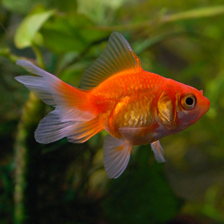

In [5]:
gold_fish = Image.open("/content/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish) / 255
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [7]:
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [13]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [14]:
image_labels[predicted_label_index]

'goldfish'

## The item is correctly classified using Transfer Learning

Now, let's load flowers dataset

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [16]:
data_dir

'./datasets/flower_photos'

In [17]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/3922005347_7b6fb82fcd.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9481563239_01b585b41d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7721658400_0dec46d225.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3154932290_4bf43bd34f_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606746467_a668c8d417.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15202632426_d88efb321a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg')]

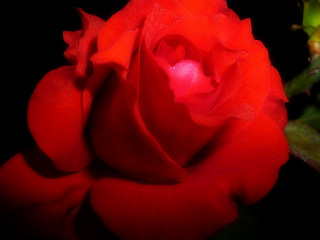

In [21]:
PIL.Image.open(str(roses[1]))

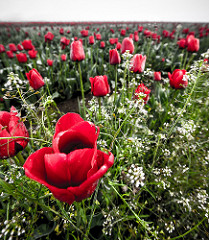

In [22]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15202632426_d88efb321a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg')]

In [26]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [29]:
img.shape

(240, 320, 3)

In [30]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [31]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [32]:
X = np.array(X)
y = np.array(y)

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [35]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [36]:
X[0].shape

(224, 224, 3)

In [39]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [40]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

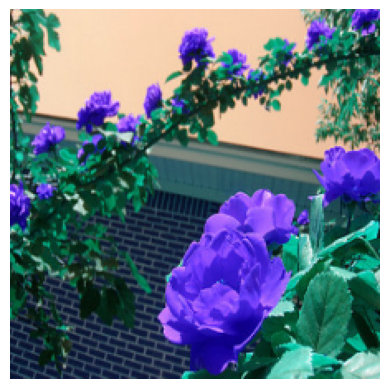

In [41]:
plt.axis('off')
plt.imshow(X[0])

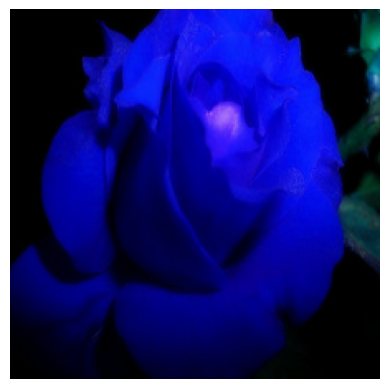

In [42]:
plt.axis('off')
plt.imshow(X[1])

In [43]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 944ms/step


array([550, 921, 722])

In [45]:
image_labels[196]

'Boston bull'

## Re-training using Flower Images

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [47]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [48]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 10s 39ms/step - loss: 0.8197 - acc: 0.6962
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.4203 - acc: 0.8590
Epoch 3/5
86/86 [==============================] - 3s 40ms/step - loss: 0.3246 - acc: 0.8990
Epoch 4/5
86/86 [==============================] - 4s 41ms/step - loss: 0.2726 - acc: 0.9190
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2317 - acc: 0.9379


In [49]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 59ms/step - loss: 0.3730 - acc: 0.8671


[0.37301868200302124, 0.8671023845672607]

# Result: Test Accuracy 86%